In [ ]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
import numpy as np
np.set_printoptions(suppress=True)

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1]:
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
# load data and split
df = pd.read_csv("/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/cleveland_full_1.csv")
cols_we_like = [col for col in df.columns if col not in [['id','location','num']]]
# train test split
X = df[cols_we_like]
y = df.num
X_train, X_test, y_train, y_test = train_test_split(X, y)

Removing mean and scaling variance
===================================

In [2]:
from sklearn.preprocessing import StandardScaler

1) Instantiate the model

In [3]:
scaler = StandardScaler()

2) Fit using only the data.

In [4]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

3) `transform` the data (not `predict`).

In [5]:
X_train_scaled = scaler.transform(X_train)

In [8]:
X_train.shape

(211, 55)

In [9]:
X_train_scaled.shape

(211, 55)

The transformed version of the data has the mean removed:

In [10]:
X_train_scaled.mean(axis=0)

array([ -9.68156571e-17,  -4.63031404e-17,  -1.93631314e-16,
         3.78843876e-17,   1.33647701e-16,  -5.38800179e-16,
         3.78843876e-17,   2.33620390e-16,  -2.10468820e-18,
         5.05125168e-17,  -5.89312696e-17,  -1.15231679e-16,
         5.26172050e-17,   3.05179789e-17,   7.15593987e-17,
         3.91472005e-15,   5.89312696e-17,  -1.26281292e-17,
        -8.41875279e-18,  -8.41875279e-18,   1.68375056e-17,
         0.00000000e+00,  -1.47328174e-17,  -4.20937640e-18,
        -2.98865724e-16,   5.43009555e-16,  -2.60981337e-16,
        -2.86237595e-16,  -4.40932178e-16,  -5.38800179e-16,
         4.10414199e-17,  -2.52562584e-17,  -3.78843876e-17,
         1.59956303e-16,   2.94656348e-17,  -8.41875279e-17,
        -2.20992261e-17,   6.31406460e-17,  -9.15539366e-17,
         2.52562584e-17,   3.91261536e-15,   2.73609466e-17,
        -2.02050067e-16,   1.43118797e-16,  -1.26281292e-17,
        -2.15730540e-17,  -3.28331359e-16,  -3.78843876e-17,
        -2.82028219e-16,

In [11]:
X_train_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  0.])

In [12]:
X_test_transformed = scaler.transform(X_test)

In [13]:
X_test_transformed.mean(axis=0)

array([ 0.19415509,  0.1897073 , -0.16506205,  0.11598227,  0.14972378,
       -0.0918847 , -0.10952007, -0.11502061,  0.02010801,  0.01335907,
       -0.08159389, -0.0412394 ,  0.1133596 , -0.06916188, -0.17991651,
        0.1759115 ,  0.068587  ,  0.22105515,  0.11702024,  0.13174769,
        0.11010346,  0.        , -0.05389747,  0.11586623, -0.04753783,
       -0.30917062, -0.16028356, -0.23766207, -0.03347738, -0.0918847 ,
       -0.12572386,  0.28252683,  0.23680924, -0.02736929, -0.07642119,
        0.13122767, -0.03713012, -0.08117398, -0.00741946, -0.22317232,
        0.19121762,  0.08424405, -0.09047657,  0.22501365,  0.21323908,
        0.04838531,  0.02142385, -0.11332626, -0.00359686,  0.        ,
        0.        ,  0.06154746,  0.0917867 , -0.0981865 ,  0.        ])

In [14]:
scaler.inverse_transform(X_test_transformed)

array([[ 210.,  227.,   37., ...,    1.,    1.,    1.],
       [ 217.,  234.,   46., ...,    1.,    1.,    1.],
       [  73.,   78.,   65., ...,    1.,    1.,    1.],
       ..., 
       [  18.,   20.,   48., ...,    1.,    1.,    1.],
       [ 177.,  193.,   56., ...,    1.,    1.,    1.],
       [   1.,    2.,   67., ...,    1.,    1.,    1.]])

Principal Component Analysis
=============================

0) Import the model

In [15]:
from sklearn.decomposition import PCA

1) Instantiate the model

In [16]:
pca = PCA(n_components=2)

2) Fit to training data

In [17]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

3) Transform to lower-dimensional representation

In [18]:
print(X.shape)
X_pca = pca.transform(X)
X_pca.shape

(282, 55)


(282, 2)

Visualize
----------

<IPython.core.display.Javascript object>


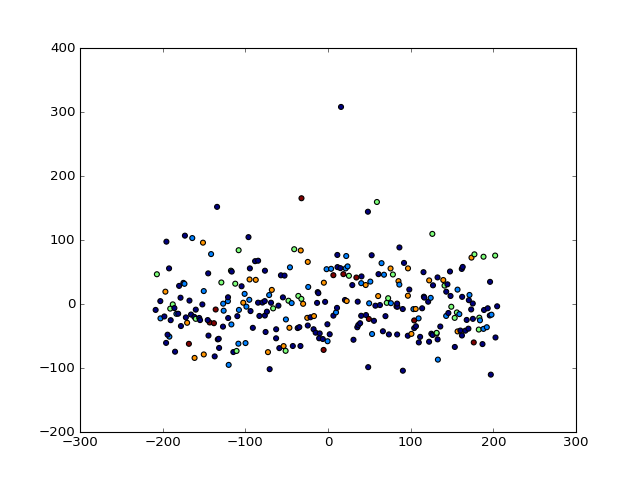

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)